# Part-2-Problem Description 

Part 2 
Here is the data set that contains the history of customer booking in a hotel.


There are three sections in this part


1. Train a machine learning model that 
predicts the customer who is going to be checked in. Once done, please test 
the prediction with below test data.



2. Do a thorough analysis on the results and the dataset with visualizations (please feel free to add creative ways of visualization here).

3. Host/Deploy the results using any hosting service you want (streamlit/flask)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Reading the Dataset 

In [2]:
hotel=pd.read_csv("train_data_evaluation_part_2.csv",index_col=0)
hotel.head()

#Assigned first column as index because index and first column was same

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
hotel.shape

(82580, 29)

# Data Cleaning & Exploration

Some steps which are used to clean data are:

1.Remove missing values, outliers,and unnecessary rows/ columns.

2.Check and impute null values.

3.Check Imbalanced data.

4.Re-indexing and reformatting our data.

In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82580 entries, 0 to 82579
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    82580 non-null  int64  
 1   Nationality           82580 non-null  object 
 2   Age                   78834 non-null  float64
 3   DaysSinceCreation     82580 non-null  int64  
 4   AverageLeadTime       82580 non-null  int64  
 5   LodgingRevenue        82580 non-null  float64
 6   OtherRevenue          82580 non-null  float64
 7   BookingsCanceled      82580 non-null  int64  
 8   BookingsNoShowed      82580 non-null  int64  
 9   BookingsCheckedIn     82580 non-null  int64  
 10  PersonsNights         82580 non-null  int64  
 11  RoomNights            82580 non-null  int64  
 12  DaysSinceLastStay     82580 non-null  int64  
 13  DaysSinceFirstStay    82580 non-null  int64  
 14  DistributionChannel   82580 non-null  object 
 15  MarketSegment      

#### As we can see only feature "Age" having the null values,lets see more in dept for "Age" feature

In [5]:
hotel['Age'].describe()

count    78834.000000
mean        45.468554
std         16.526276
min        -11.000000
25%         34.000000
50%         46.000000
75%         57.000000
max        122.000000
Name: Age, dtype: float64

Age can't be Negative ,so all Negative Age values are null values ,also 75% of data is less than 57 age, it means we have outlilers in age

In [6]:
print('The Total No. of Negative values present in Age is :', len(hotel[hotel['Age'] < 0]))
print('The % of Missing Values in Age is :', round(hotel['Age'].isnull().sum()*100/len(hotel)))
print('The Total No.of outliers values present in Age is :',len(hotel[hotel['Age']>100]))

The Total No. of Negative values present in Age is : 17
The % of Missing Values in Age is : 5
The Total No.of outliers values present in Age is : 8


lets remove the negative values  & outliers from Age.

null values present in Age is 5%, so we can drop these values, but instead of dropping we will impute this by using mean.
(Reason-Loosing the data is not best approach).
 


In [7]:
hotel['Age'].fillna(value=hotel['Age'].mean(),inplace=True)
hotel['Age'].describe()

#imputed null values by mean

count    82580.000000
mean        45.468554
std         16.147088
min        -11.000000
25%         34.000000
50%         45.468554
75%         56.000000
max        122.000000
Name: Age, dtype: float64

In [8]:
hotel=hotel[hotel['Age']>0]  #Deleting all Negative values
hotel = hotel[hotel['Age'] < 100]

In [9]:
print('The Total No. of Negative values present in Age is :', len(hotel[hotel['Age'] < 0]))
print('The % of Missing Values in Age is :', hotel['Age'].isnull().sum())
print('The Total No.of outliers values present in Age is :',len(hotel[hotel['Age']>100]))

The Total No. of Negative values present in Age is : 0
The % of Missing Values in Age is : 0
The Total No.of outliers values present in Age is : 0


we removed all negative & outliers from age & imputed null values (5%) with mean

### Checking how many unique values are there in each feature.

In [10]:
hotel.nunique().to_frame(name = 'Number of unique values')

,Number of unique values
ID,82515
Nationality,187
Age,94
DaysSinceCreation,1083
AverageLeadTime,418
LodgingRevenue,10137
OtherRevenue,4469
BookingsCanceled,6
BookingsNoShowed,4
BookingsCheckedIn,29


In [11]:
#Check if data holds duplicate values.
hotel.duplicated().any()

False

There are no duplicate data in dataset

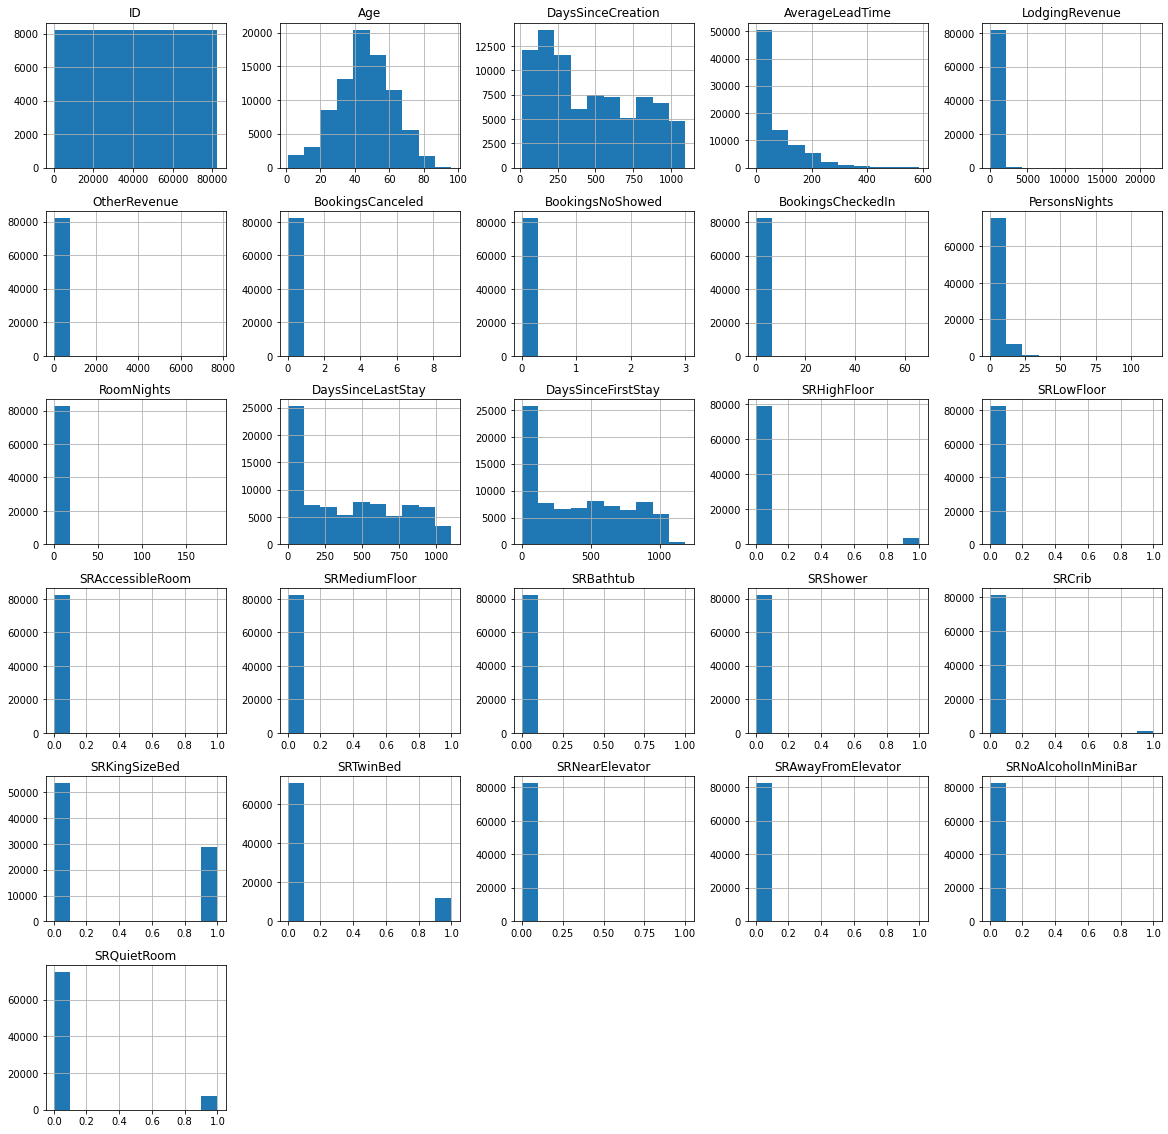

In [12]:
hotel.hist(figsize = (20,20))
plt.show()

from the above histogram, we can see the 60% our data having binary datatype, and all those binary features consist of almost 99% data is 0 only.

rest 'Age' feature is normally distributed, 'AverageLeadTime' feature data distribution is left skewed & 75% of data is under 100 and 25% data is above 100.

# Descriptive Analysis & Data Preprocessing

In [13]:
hotel.describe().T.style.set_properties(**{'background-color': '#282120','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
ID,82515.000000,41281.017621,23832.690901,1.000000,20647.500000,41277.000000,61914.500000,82580.000000
Age,82515.000000,45.494846,16.090608,1.000000,34.000000,45.468554,56.000000,96.000000
DaysSinceCreation,82515.000000,459.232879,311.253482,12.000000,183.000000,406.000000,728.000000,1095.000000
AverageLeadTime,82515.000000,66.572563,87.923468,-1.000000,0.000000,30.000000,104.000000,588.000000
LodgingRevenue,82515.000000,300.621777,373.406157,0.000000,67.200000,234.000000,404.000000,21781.000000
OtherRevenue,82515.000000,67.922798,114.524716,0.000000,2.000000,39.000000,88.000000,7730.250000
BookingsCanceled,82515.000000,0.002048,0.067203,0.000000,0.000000,0.000000,0.000000,9.000000
BookingsNoShowed,82515.000000,0.000642,0.029737,0.000000,0.000000,0.000000,0.000000,3.000000
BookingsCheckedIn,82515.000000,0.798776,0.696903,0.000000,1.000000,1.000000,1.000000,66.000000
PersonsNights,82515.000000,4.670654,4.562870,0.000000,1.000000,4.000000,7.000000,116.000000


As we can see there are no null values now in dataset.

feature "AverageLeadTime" have the min value is -1, so we will remove these  negative values by checking their contribution.

In [14]:
hotel =hotel[hotel['AverageLeadTime']>=0]
hotel['AverageLeadTime'].describe()

count    82505.000000
mean        66.580753
std         87.925649
min          0.000000
25%          0.000000
50%         30.000000
75%        104.000000
max        588.000000
Name: AverageLeadTime, dtype: float64

As an result there are only 10 values are removed from 'AverageLeadTime' so it will not make big effect on our model

### Remove less important column

In [15]:
hotel.drop('ID',axis=1, inplace = True)

In [16]:
hotel.head(2)

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.000000,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,0,0,0
1,PRT,45.468554,1095,61,280.0,53.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0


## Lets see Distribution of Nationalities

In [17]:
hotel['Nationality'].value_counts()*100/len(hotel)

FRA    14.902127
PRT    13.783407
DEU    12.307133
GBR    10.426035
ESP     5.891764
         ...    
GNQ     0.001212
GIN     0.001212
SWZ     0.001212
SOM     0.001212
NPL     0.001212
Name: Nationality, Length: 187, dtype: float64

There are about 187 different nationalities, when we get to the encoding step, this will increase the dimensionality.

As we can see above first 10-15 nations covers the almost 98% of data so we will keep only TOP 15 rest we will remove.

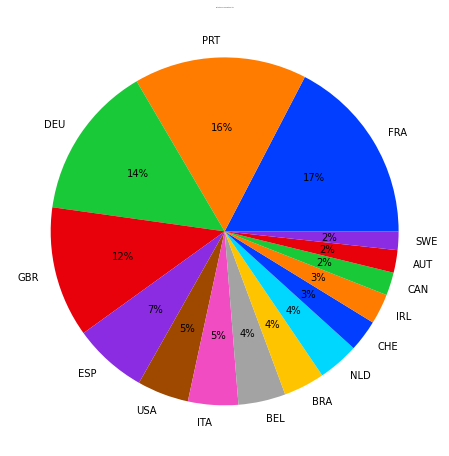

In [18]:
top_16_nation = hotel['Nationality'].value_counts().head(15)
colors = sns.color_palette('bright')
plt.figure(figsize=(15,8))
plt.pie(top_16_nation, labels =top_16_nation.keys() , colors = colors, autopct='%.0f%%')

plt.title('Distribution of Top 16 Nationalities',fontsize=0,color='Black')

plt.show()

In [19]:
# Remove unimportant nationalities 
names = hotel.groupby('Nationality').count().sort_values(by = 'Age', ascending = False)
top_15_nationalities = list(names[names['Age'] < 1000]['Age'].keys())

for i in top_15_nationalities:
    hotel['Nationality'] = hotel['Nationality'].str.replace(i,'')
    
print('The number of nationalities after preprocessing is %s' %hotel['Nationality'].nunique())

The number of nationalities after preprocessing is 16


In [20]:
hotel['Nationality'].unique()

array(['PRT', 'DEU', 'FRA', '', 'IRL', 'ESP', 'BEL', 'NLD', 'AUT', 'ITA',
       'USA', 'CHE', 'GBR', 'BRA', 'CAN', 'SWE'], dtype=object)

Now we removed successfully all the nationalities which are contribution less than 2% ,so before 187 Nations were available now is 16 Nations are there.

### DistributionChannel & MarketSegment(These two also categorical data)

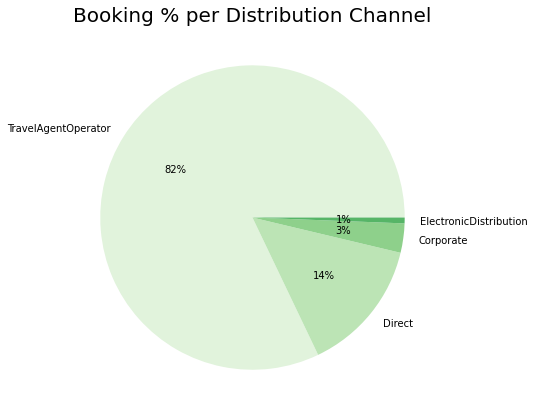

In [21]:
data = hotel['DistributionChannel'].value_counts()*100 /len(hotel)
colors = sns.color_palette('Greens')
plt.figure(figsize=(10,7))
plt.pie(data, labels =data.keys() , colors = colors, autopct='%.0f%%')

plt.title('Booking % per Distribution Channel',fontsize=20,color='Black')

plt.show()

As shown in above pie chart, 82% booking done by "Travel Agent/Operator".

In [22]:
hotel['MarketSegment'].value_counts()*100 /len(hotel)

Other                  57.464396
TravelAgentOperator    13.907036
Direct                 13.653718
Groups                 11.507181
Corporate               2.586510
Complementary           0.586631
Aviation                0.294528
Name: MarketSegment, dtype: float64

In the MarketSegment total 7 catagories are available.

In [23]:
# Encoding catagorical data into numerical data by using "One Hot Encoding"
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['MarketSegment', 'DistributionChannel']),
    remainder='drop')

transformed = transformer.fit_transform(hotel)
transformed_hotel = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

# Concat the two tables
transformed_hotel.reset_index(drop=True, inplace=True)
hotel.reset_index(drop=True, inplace=True)
hotel_2 = pd.concat([transformed_hotel, hotel], axis=1)

In [24]:
# Remove old columns
hotel_2.drop(['MarketSegment', 'DistributionChannel'], axis = 1, inplace = True)
print('The shape after encoding: {}'.format(hotel_2.shape))

The shape after encoding: (82505, 37)


# Checking for Balancing of data

In [25]:
hotel['BookingsCheckedIn'].value_counts() 

1     61706
0     19350
2      1141
3       132
4        59
5        20
6        20
7        16
8        10
9         9
10        7
11        6
12        4
13        4
29        3
15        3
23        2
14        2
25        1
17        1
66        1
26        1
57        1
40        1
18        1
24        1
19        1
20        1
34        1
Name: BookingsCheckedIn, dtype: int64

According to our problem, we need to create the model "which predict customer will checkedin or not", so our label is "BookingsCheckedIn",

in which 0--Customers booked room but not did checkedin

1---Customers booked room also checkedin(came for hotel stay)

2--customers checkedin 2 times,3--customers checkedin 3 times ....so on 34--customer repeatedly checkeding and came 34th tme,but only 1 customer is there.

So according to my understanding this is an multiclass classification problem,but because of unavailibilty of data or data is not evenly distributed to each class & based on our and problem main motive we will, convert multiclass to binary classification. by converting all checking greter than 1=1 class.

so final we will have only two classes 1----checkedin 0---not checkedin.

In [26]:
hotel_2.loc[hotel_2['BookingsCheckedIn']>1,"BookingsCheckedIn"]=1
hotel_2['BookingsCheckedIn'].value_counts()

1    63155
0    19350
Name: BookingsCheckedIn, dtype: int64

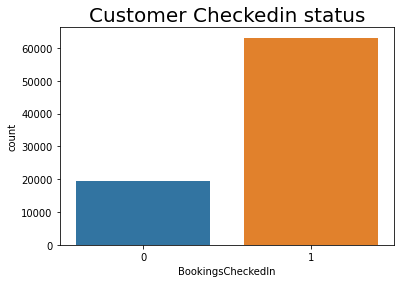

In [27]:
plt.title('Customer Checkedin status',fontsize=20,color='Black')
sns.countplot(x='BookingsCheckedIn',data=hotel_2)
plt.show()

Because our data is quite imbalaced ,minority class is 0-not checked in, so it can affect to our model performance,
to overcome with this problem we can use "SMOTE" technique .

SMOTE--Synthetic Minority Oversampling Technique, whcih will generate artifical samples by using k-nearest neighbor for the minority class.

In [28]:
hotel_2.drop('Nationality',axis=1, inplace = True)

# Correlation B/W Independent & Dependent Variable

In [29]:
hotel_2.corr().round(2)

,onehotencoder__MarketSegment_Aviation,onehotencoder__MarketSegment_Complementary,onehotencoder__MarketSegment_Corporate,onehotencoder__MarketSegment_Direct,onehotencoder__MarketSegment_Groups,onehotencoder__MarketSegment_Other,onehotencoder__MarketSegment_TravelAgentOperator,onehotencoder__DistributionChannel_Corporate,onehotencoder__DistributionChannel_Direct,onehotencoder__DistributionChannel_ElectronicDistribution,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
onehotencoder__MarketSegment_Aviation,1.00,-0.00,-0.01,-0.02,-0.02,-0.06,-0.02,0.30,-0.02,-0.00,...,-0.00,-0.00,-0.00,-0.01,-0.03,-0.02,-0.00,-0.00,-0.00,-0.02
onehotencoder__MarketSegment_Complementary,-0.00,1.00,-0.01,-0.03,-0.03,-0.09,-0.03,-0.00,0.14,-0.01,...,0.00,0.00,-0.00,0.02,-0.00,-0.01,-0.00,-0.00,-0.00,-0.02
onehotencoder__MarketSegment_Corporate,-0.01,-0.01,1.00,-0.06,-0.06,-0.19,-0.07,0.71,-0.06,-0.01,...,0.02,-0.01,-0.01,-0.01,-0.07,-0.03,-0.00,-0.00,-0.00,-0.05
onehotencoder__MarketSegment_Direct,-0.02,-0.03,-0.06,1.00,-0.14,-0.46,-0.16,-0.07,0.95,-0.03,...,0.01,0.03,0.03,0.05,-0.13,-0.06,0.00,0.02,-0.00,-0.06
onehotencoder__MarketSegment_Groups,-0.02,-0.03,-0.06,-0.14,1.00,-0.42,-0.14,0.04,-0.13,-0.03,...,-0.01,-0.02,-0.02,-0.03,-0.11,0.08,-0.00,-0.02,-0.00,-0.11
onehotencoder__MarketSegment_Other,-0.06,-0.09,-0.19,-0.46,-0.42,1.00,-0.47,-0.20,-0.47,0.06,...,0.00,-0.00,-0.00,-0.01,0.34,0.03,0.00,0.01,0.01,0.21
onehotencoder__MarketSegment_TravelAgentOperator,-0.02,-0.03,-0.07,-0.16,-0.14,-0.47,1.00,-0.05,-0.16,-0.03,...,-0.01,-0.01,-0.01,-0.01,-0.21,-0.04,0.00,-0.01,-0.00,-0.11
onehotencoder__DistributionChannel_Corporate,0.30,-0.00,0.71,-0.07,0.04,-0.20,-0.05,1.00,-0.07,-0.01,...,0.02,-0.01,-0.00,-0.01,-0.08,-0.03,-0.00,-0.00,-0.00,-0.05
onehotencoder__DistributionChannel_Direct,-0.02,0.14,-0.06,0.95,-0.13,-0.47,-0.16,-0.07,1.00,-0.03,...,0.00,0.03,0.03,0.05,-0.14,-0.06,0.00,0.02,-0.00,-0.07
onehotencoder__DistributionChannel_ElectronicDistribution,-0.00,-0.01,-0.01,-0.03,-0.03,0.06,-0.03,-0.01,-0.03,1.00,...,-0.00,-0.00,-0.00,-0.01,-0.04,-0.03,-0.00,0.00,-0.00,-0.02


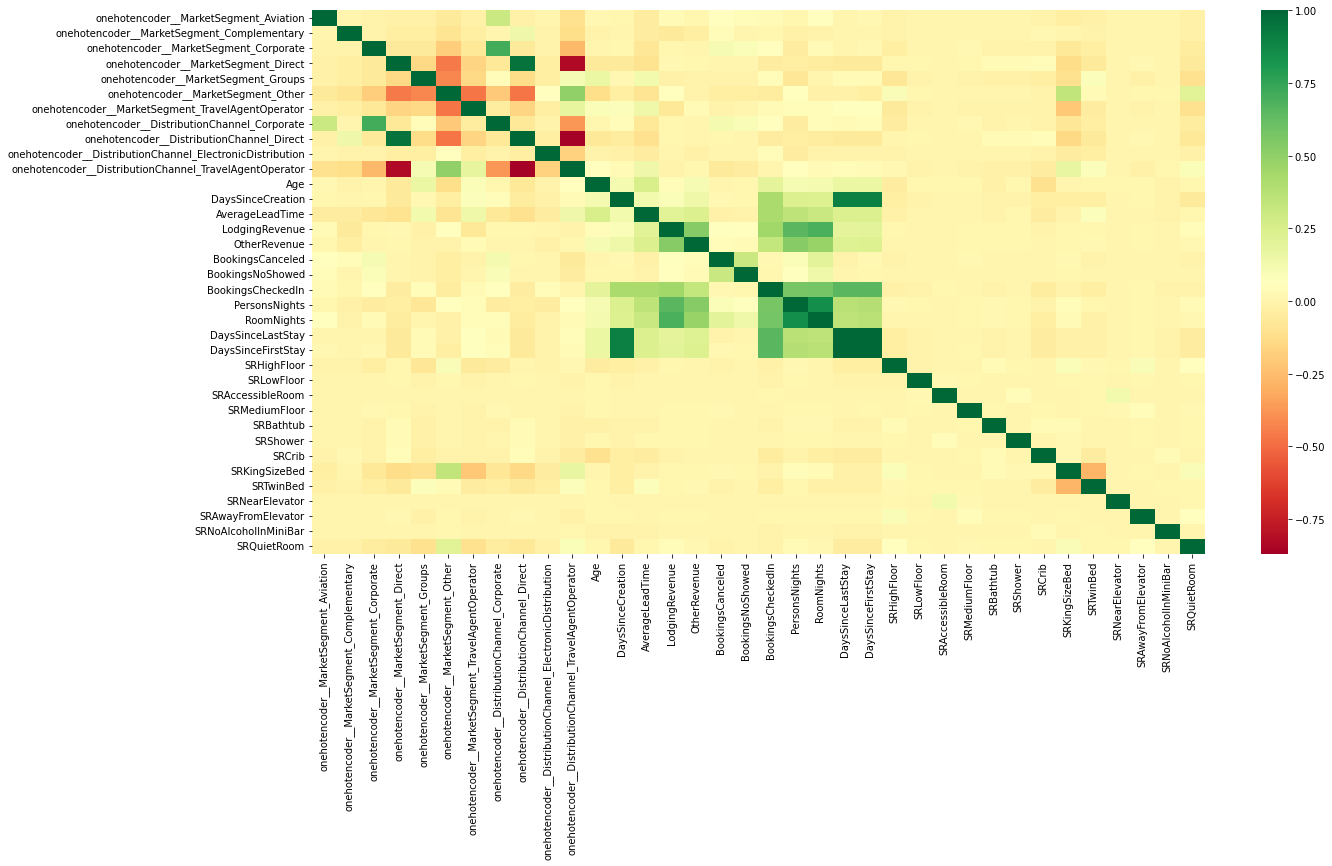

In [30]:
correlation = hotel_2.corr().round(2)
plt.figure(figsize = (20,10))
sns.heatmap(correlation, annot = None, cmap = 'RdYlGn')
plt.show()

Because of having large dimetions/features,quite difficult to check relationship.

But as per observation "RoomNights" feature is highly correlated with "BookingsCheckedIn" i.e 0.65.

The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

also we can apply the PCA(Principle componenet analysis) method to reduce the dimentionality.

# Calculating Important Features

In [31]:
X = hotel_2.drop('BookingsCheckedIn',axis=1)
y = hotel_2['BookingsCheckedIn']

In [32]:
#Feature importance- Calculating magnitude of coff
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [33]:
print(model.feature_importances_)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.75748179e-04
 2.17718623e-02 4.94186143e-02 2.60242827e-02 2.33838631e-04
 0.00000000e+00 0.00000000e+00 4.12395130e-02 3.37751854e-02
 4.13805433e-01 4.12955522e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


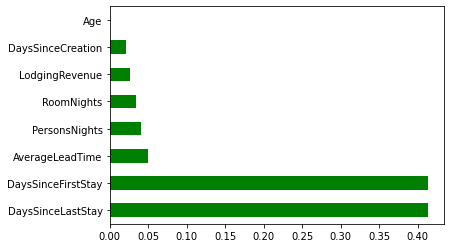

In [34]:
#Plot the graph to better understanding of feature importance
feat_importance =pd.Series(model.feature_importances_,index =X.columns)
feat_importance.nlargest(8).plot(kind='barh',color='Green')
plt.show()

# Applying SMOTE to solve the imbalanced data issue

In [35]:
#spliting x & y for training dataset
X = hotel_2.drop('BookingsCheckedIn',axis=1)
y = hotel_2['BookingsCheckedIn']

In [36]:
#splitting xtrain & y train
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
unique, count =np.unique(ytrain,return_counts=True)
ytrain_dict_value_count ={k:v for (k,v) in zip (unique,count)}
ytrain_dict_value_count

{0: 15433, 1: 50571}

In [38]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
xtrain_res,ytrain_res =sm.fit_resample(xtrain,ytrain)


In [39]:
unique, count =np.unique(ytrain_res,return_counts=True)
ytrain_smote_value_count ={k:v for (k,v) in zip (unique,count)}
ytrain_smote_value_count

{0: 50571, 1: 50571}


We know that our dataset is imbalanced,because

Outcome 1= No.customer who checkedIN to hotel =60K records available, Outcome 0= No.customer who not did checkedIN to hotel=20K records available, so almost 74% data avaiable for class 1 and for class 0 almost 26% of data availble

so our both 0 and 1 catagories records are not equally distributes.which will give "Biased result".

To overcome with this Imbalacing of dataset we have few techniques

1.Undersampling of Mejority Class(Outcome-0)---But if we use this method most of the data will be waste so this is not the best approch, we want to utilise full data without loosing information.

2.Oversampling Minority Class (0) by duplicate--this we can do.

3.SMOTE-Synthetic Minority Oversampling Technique.---We uses this technique.

Before applying SMOTE training dataset class={0: 15433, 1: 50571}

after applying SMOTE training dataset class ={0: 50571, 1: 50571}
means now class 0 and 1 are evenly distributed and will feed to model training

# 1. Model Training Using Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(xtrain_res,ytrain_res)

In [41]:
y_prediction = clf.predict(xtest)

In [42]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [43]:
print(classification_report(ytest,y_prediction))
print(accuracy_score(ytest,y_prediction))
print(confusion_matrix(ytest,y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3917
           1       1.00      1.00      1.00     12584

    accuracy                           1.00     16501
   macro avg       1.00      1.00      1.00     16501
weighted avg       1.00      1.00      1.00     16501

1.0
[[ 3917     0]
 [    0 12584]]


Model accuracy is 100% lets see accuracy on test dataset further

# Using Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain_res,ytrain_res)

RandomForestClassifier()

In [45]:
y_predict_forest = rfc.predict(xtest)

In [46]:
print(classification_report(ytest,y_predict_forest))
print(accuracy_score(ytest,y_predict_forest))
print(confusion_matrix(ytest,y_predict_forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3917
           1       1.00      1.00      1.00     12584

    accuracy                           1.00     16501
   macro avg       1.00      1.00      1.00     16501
weighted avg       1.00      1.00      1.00     16501

1.0
[[ 3917     0]
 [    0 12584]]


# Test_Data Importing 

In [47]:
test_data =pd.read_csv('test_data_evaluation_part2.csv',index_col=0)
test_data.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82591,SGP,47.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82592,SGP,16.0,11,130,483.48,155.1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,82593,SGP,15.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,82594,SGP,12.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82595,PRT,NaN,11,0,0.00,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
test_data.shape

(1000, 29)

In [49]:
test_data['Nationality'].nunique()


49

In [50]:
test_data.drop('Nationality',axis=1,inplace=True)
test_data.drop('ID',axis=1,inplace=True)

As per the i observed, Nationality in training dataset having no. of unique category =187
after encoding & compressing we get total 61 features in training dataset.

But in test data only 49 nationalities available ,which we conflict dimention of test and train data and also nationality is not an important feature here thats why we drop nationality from train and test dataset

In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   967 non-null    float64
 1   DaysSinceCreation     1000 non-null   int64  
 2   AverageLeadTime       1000 non-null   int64  
 3   LodgingRevenue        1000 non-null   float64
 4   OtherRevenue          1000 non-null   float64
 5   BookingsCanceled      1000 non-null   int64  
 6   BookingsNoShowed      1000 non-null   int64  
 7   BookingsCheckedIn     1000 non-null   int64  
 8   PersonsNights         1000 non-null   int64  
 9   RoomNights            1000 non-null   int64  
 10  DaysSinceLastStay     1000 non-null   int64  
 11  DaysSinceFirstStay    1000 non-null   int64  
 12  DistributionChannel   1000 non-null   object 
 13  MarketSegment         1000 non-null   object 
 14  SRHighFloor           1000 non-null   int64  
 15  SRLowFloor            

In [52]:
test_data['Age'].fillna(value=test_data['Age'].mean(),inplace=True)
test_data['Age'].describe()

count    1000.000000
mean       39.720786
std        18.842071
min         0.000000
25%        25.000000
50%        41.000000
75%        53.000000
max        90.000000
Name: Age, dtype: float64

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['MarketSegment', 'DistributionChannel']),
    remainder='drop')

transformed = transformer.fit_transform(test_data)
transformed_test_data = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

# Concat the two tables
transformed_test_data.reset_index(drop=True, inplace=True)
hotel.reset_index(drop=True, inplace=True)
test_data_encod = pd.concat([transformed_test_data, test_data], axis=1)

In [54]:
# Remove old columns
test_data_encod.drop(['MarketSegment', 'DistributionChannel'], axis = 1, inplace = True)
print('The shape after encoding: {}'.format(test_data_encod.shape))

The shape after encoding: (1000, 36)


In [55]:
test_data['MarketSegment'].value_counts()

Other                  577
TravelAgentOperator    184
Direct                 177
Corporate               34
Complementary           26
Groups                   1
Aviation                 1
Name: MarketSegment, dtype: int64

In [56]:
test_data['DistributionChannel'].value_counts()

TravelAgentOperator       763
Direct                    201
Corporate                  35
ElectronicDistribution      1
Name: DistributionChannel, dtype: int64

In [57]:
test_data_encod.loc[test_data_encod['BookingsCheckedIn']>1,"BookingsCheckedIn"]=1
test_data_encod['BookingsCheckedIn'].value_counts()

0    521
1    479
Name: BookingsCheckedIn, dtype: int64

In [58]:
test_data_encod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   onehotencoder__MarketSegment_Aviation                      1000 non-null   float64
 1   onehotencoder__MarketSegment_Complementary                 1000 non-null   float64
 2   onehotencoder__MarketSegment_Corporate                     1000 non-null   float64
 3   onehotencoder__MarketSegment_Direct                        1000 non-null   float64
 4   onehotencoder__MarketSegment_Groups                        1000 non-null   float64
 5   onehotencoder__MarketSegment_Other                         1000 non-null   float64
 6   onehotencoder__MarketSegment_TravelAgentOperator           1000 non-null   float64
 7   onehotencoder__DistributionChannel_Corporate               1000 non-null   float64
 8   onehotenc

# Testing model on test_data


### 1.Logistic-Regression Model testing on Test_data

In [59]:
x_test = test_data_encod.drop('BookingsCheckedIn',axis=1)
y_test = test_data_encod['BookingsCheckedIn']

In [60]:
y_test_predict_logistic= clf.predict(x_test)

In [61]:
print(classification_report(y_test,y_test_predict_logistic))
print(accuracy_score(y_test,y_test_predict_logistic))
print(confusion_matrix(y_test,y_test_predict_logistic))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       521
           1       1.00      0.99      0.99       479

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

0.994
[[521   0]
 [  6 473]]


### 2.Random-Forest-Classifier Model testing on Test_data

In [62]:
#random forest on test data
y_predict_forest = rfc.predict(x_test)

In [63]:
print(classification_report(y_test,y_predict_forest))
print(accuracy_score(y_test,y_predict_forest))
print(confusion_matrix(y_test,y_predict_forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       521
           1       1.00      1.00      1.00       479

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

1.0
[[521   0]
 [  0 479]]


In [64]:
#accuracy evaluation
from sklearn.metrics import accuracy_score
accuracy_logistic=accuracy_score(y_test,y_test_predict_logistic)

accuracy_Forest=accuracy_score(y_test,y_predict_forest)


In [65]:
#accuracy test
print("Logistic Regression :", round(accuracy_logistic*100))

print("Random Forest Classifier :",round(accuracy_Forest*100))


Logistic Regression : 99
Random Forest Classifier : 100


In [66]:
#Confusion Matrix for Random Forest Algorithm
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict_forest)
pd.crosstab(y_test, y_predict_forest, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,521,0,521
1,0,479,479
All,521,479,1000


Text(0.5, 15.0, 'Predicted label')

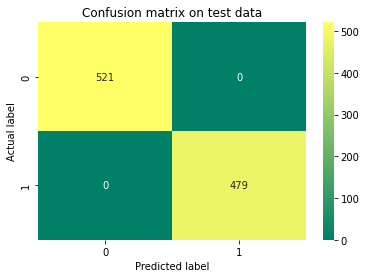

In [67]:
#Confusion Matrix Heatmap for Logistic Regression algorithm
from sklearn import metrics
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="summer" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Finally our model accuracy using

1.Logistic Regression : 99%
Confusion matrix is [521     0][6      473]  which means model got confused 6 time to predict 1(Customer Checked In),and it wrongly predicted 0(Customer not CheckedIn) 6times.
                    
also 994 times out of 1000time, model predicted actual result.

2.Random Forest Classifier : 100%  on the test data,

so definatly it is not overfitting.

So while model deployment we will use Random forest classifier.



# Model Saving

In [68]:
np.array(hotel_2.iloc[0])

array([0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.100e+01,
       1.500e+02, 4.500e+01, 3.710e+02, 1.053e+02, 1.000e+00, 0.000e+00,
       1.000e+00, 8.000e+00, 5.000e+00, 1.510e+02, 1.074e+03, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])

In [69]:
input_data =(0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,51.0,150.0,45.0,371.0,105.3,1.0,0.0,8.0,5.0,151.0,1074.0,0.0,
             0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0)


In [70]:
#hotel_2.info()

In [71]:
#changing the input data to numpy array
input_data_as_np_array =np.array(input_data)

#reshape the numpy array as we predicting for instances
input_data_reshape =input_data_as_np_array.reshape(1,-1)

prediction =rfc.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0 ):
    print('This Customer will not Checkin')
else:
    print('This Customer will do Checkin')
    

[1]
This Customer will do Checkin


C:\Users\anura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Saving the Trained model

In [72]:
import pickle

In [73]:
filename ='trained_model.sav'
pickle.dump(rfc,open(filename, 'wb'))

In [74]:
#Loading the saved model
loaded_model =pickle.load(open('trained_model.sav','rb'))

In [75]:
#changing the input data to numpy array
input_data_as_np_array =np.array(input_data)

#reshape the numpy array as we predicting for instances
input_data_reshape =input_data_as_np_array.reshape(1,-1)

prediction =loaded_model.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0 ):
    print('This Customer will not Checkin')
else:
    print('This Customer will do Checkin')
    

[1]
This Customer will do Checkin


C:\Users\anura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


.

# --------00000-------00000---------Thank You---------00000---------000000--------

# Few Interesting Visualizations

## 1.People really are cancelling a LOT

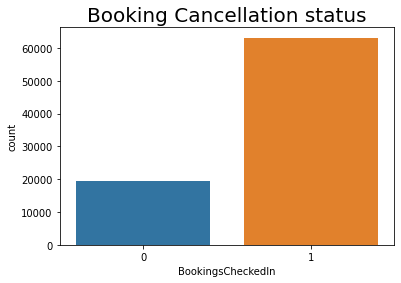

1    76.546876
0    23.453124
Name: BookingsCheckedIn, dtype: float64

In [76]:
plt.title('Booking Cancellation status',fontsize=20,color='Black')
sns.countplot(x='BookingsCheckedIn',data=hotel_2)
plt.show()
hotel_2['BookingsCheckedIn'].value_counts()*100/len(hotel_2)

# Insides

1-Not cancelled 76% of people make the hotel Booking,and came for stay

0-Booking cancelled, 23% of guests cancelled their booking

## 2.Top Nationalities Contributing for maximum guests

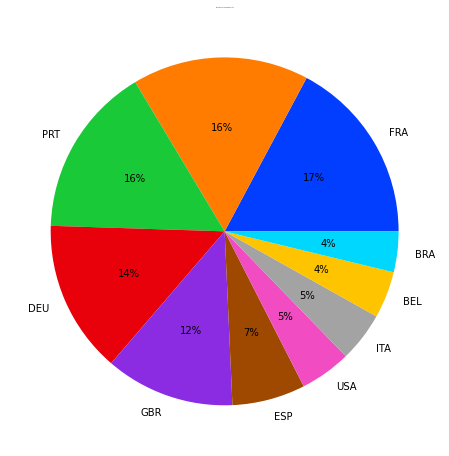

In [77]:
top_10_nation = hotel['Nationality'].value_counts().head(10)
colors = sns.color_palette('bright')
plt.figure(figsize=(12,8))
plt.pie(top_10_nation, labels =top_10_nation.keys() , colors = colors, autopct='%.0f%%')

plt.title('Distribution of Top 10 Nationalities',fontsize=0,color='Black')

plt.show()

## Insides

Top 3 Nations from where almost 50% of guest are comming

i.e 1.Frabce 2.Portugal3.Germany

## 3.Top Distribution Channels Whose Contribution is High

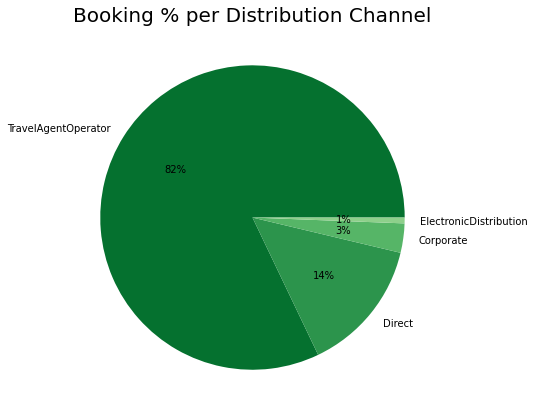

In [78]:
data = hotel['DistributionChannel'].value_counts()*100 /len(hotel)
colors = sns.color_palette('Greens_r')
plt.figure(figsize=(10,7))
plt.pie(data, labels =data.keys() , colors = colors, autopct='%.0f%%')

plt.title('Booking % per Distribution Channel',fontsize=20,color='Black')

plt.show()

## Insides

84% Of Hotel booking for the guest is done through the "Travel Agent Operators"

14% of Hotel booking done through Direct

## 4.Customers asking for the Facillities

### 4.1.Customer Asking for High Floor

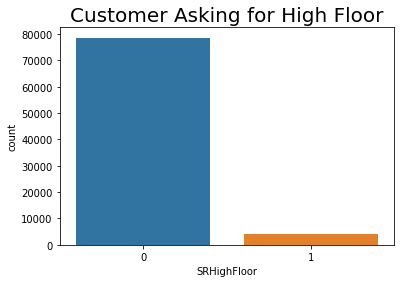

0    95.247561
1     4.752439
Name: SRHighFloor, dtype: float64

In [79]:
plt.title('Customer Asking for High Floor',fontsize=20,color='Black')
sns.countplot(x='SRHighFloor',data=hotel_2)
plt.show()
hotel_2['SRHighFloor'].value_counts()*100/len(hotel_2)

Around 5% Customers asking for the high floor

### 4.2.Customer Asking for Low Floor

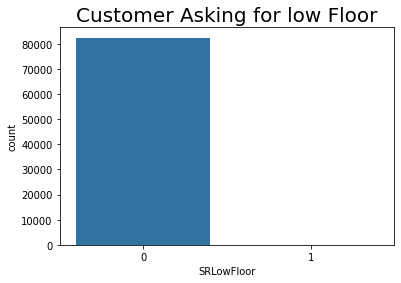

0    99.856978
1     0.143022
Name: SRLowFloor, dtype: float64

In [80]:
plt.title('Customer Asking for low Floor',fontsize=20,color='Black')
sns.countplot(x='SRLowFloor',data=hotel_2)
plt.show()
hotel_2['SRLowFloor'].value_counts()*100/len(hotel_2)

### 4.3.Customer Asking for KingSizeBed

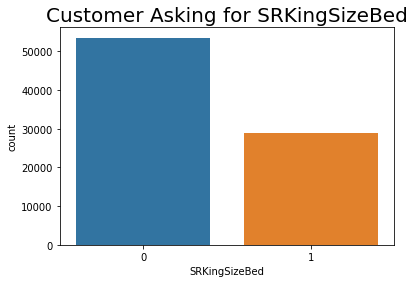

0    64.840919
1    35.159081
Name: SRKingSizeBed, dtype: float64

In [81]:
plt.title('Customer Asking for SRKingSizeBed',fontsize=20,color='Black')
sns.countplot(x='SRKingSizeBed',data=hotel_2)
plt.show()
hotel_2['SRKingSizeBed'].value_counts()*100/len(hotel_2)

### 4.4.Customer Asking for QuietRoom

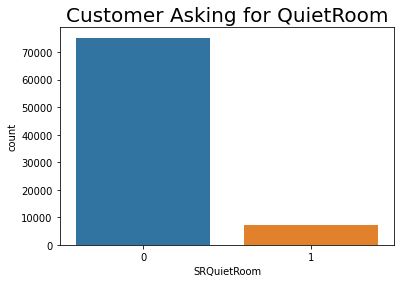

0    91.189625
1     8.810375
Name: SRQuietRoom, dtype: float64

In [82]:
plt.title('Customer Asking for QuietRoom',fontsize=20,color='Black')
sns.countplot(x='SRQuietRoom',data=hotel_2)
plt.show()
hotel_2['SRQuietRoom'].value_counts()*100/len(hotel_2)

# --------00000-------00000---------Thank You---------00000---------000000--------